In [25]:
from typing import TypedDict, List, Dict, Any, Optional
from langgraph.graph import StateGraph

In [26]:
class AgentState(TypedDict):
    name: str
    age: int
    skills: list[str]
    result: Optional[str]



In [27]:
def process_node_one(state: AgentState) -> AgentState:
    state["result"] = "Hi ! " + state["name"].upper() + " Welcome to the system."
    return state

def process_node_two(state: AgentState) -> AgentState:
    state["result"] = state["result"] + "You're " + str(state["age"]) + " years old."
    return state

def process_node_three(state: AgentState) -> AgentState:
    state["result"] = state["result"] + "And skilled in " + ", ".join([skill.upper() for skill in state["skills"]])
    return state

In [28]:
graph = StateGraph(AgentState)

graph.add_node("NodeOne", process_node_one)
graph.add_node("NodeTwo", process_node_two)
graph.add_node("NodeThree", process_node_three)
graph.set_entry_point("NodeOne")
graph.add_edge("NodeOne", "NodeTwo")
graph.add_edge("NodeTwo", "NodeThree")
graph.set_finish_point("NodeThree")

app = graph.compile()

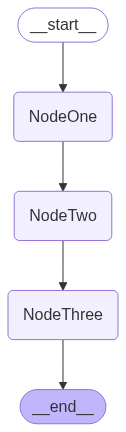

In [14]:
from IPython.display import display, Image
display(Image(app.get_graph().draw_mermaid_png()))

In [29]:
result = app.invoke({"name":"Linda", "age":30, "skills":["Python", "Machine Learning", "Langgraph"]})
print(result)

{'name': 'Linda', 'age': 30, 'skills': ['Python', 'Machine Learning', 'Langgraph'], 'result': "Hi ! LINDA Welcome to the system.You're 30 years old.And skilled in PYTHON, MACHINE LEARNING, LANGGRAPH"}
